# Парсинг с помощью BeautifulSoup

Beautiful Soup - это библиотека для Python, которая позволяет парсить (анализировать) HTML и XML документы. Она предоставляет удобный способ искать, навигировать, и модифицировать дерево DOM (Document Object Model), представляющее HTML/XML документ.

# Задание

Вам необходимо собрать датасет, спарсив данные из этого сайта:

https://президентскиегранты.рф/public/application/cards

Всего на сайте 1000 книг. То есть длина датасета должна равняться количеству книг.
 
Итоговая таблица должна содержать следующие столбцы:

| Название столбца | Описание | 
|--|--|
|id| Идентификатор книги |
|book_name| Название книги |
|price| Цена в £ |
|stock| Наличие книги. 1 или 0|
|url| Ссылка на книгу |

**Примечание по столбцам:**
- `id` - заполняется разработчиком датасета. Первая спарсенная книга имеет `id` = `0`.
- `url` - должна содержать полную ссылку. Не только конец ссылки, указанный на сайте. То есть по данному url можно перейти одним кликом.

## Импорт библиотек

In [54]:
# ваш код здесь
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from tqdm import tqdm

## Cоздание датасета и парсинг данных

In [55]:
# ваш код здесь

In [1]:
import requests
from bs4 import BeautifulSoup
import csv


In [ ]:
url= 'https://books.toscrape.com'

In [19]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 YaBrowser/24.1.0.0 Safari/537.36'}

In [49]:
base_url = 'https://xn--80afcdbalict6afooklqi5o.xn--p1ai/public/application/'

response = requests.get(base_url,headers=headers,timeout=10)
html=response.content

soup = BeautifulSoup(html, 'html.parser')

soup

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [47]:
project = soup.find_all('h1')
project

[<h1>
           404
         </h1>]

<div class="table__row cards-item-row">
        <div class="table__cell cards-item-cell">
            <div class="projects__title">Русская усадьба, как явление национальной культуры.</div>
            <div class="projects__title-sub">
                <div class="contest">Первый конкурс 2024</div>
                <div class="direction">Развитие общественной дипломатии и поддержка соотечественников</div>
                <div class="duration" style="display: none !important;">долгосрочный проект</div>
            </div>
            <div class="js-p-clone-to"></div>
        </div>
        <div class="table__cell js-p-clone-from cards-item-cell">
            
                <div class="projects__price">
                     992 750,00&nbsp;<span class="rubl">₽</span>
                </div>
                    <div class="projects__fond">
                        <div>Расходы на реализацию</div>
                        <div class="projects__price projects__price--fond">
                            <span class="projects__str-no-wrap"> 992 750,00&nbsp;<span class="rubl">₽</span></span>

                        </div>
                    </div>

            <div class="projects__descr">
                <div>Нижегородская область</div>
                <div class="projects__type">
                    <span class="">проект не получил поддержку</span>
                </div>
                <span>
                        <span class="projects__str-no-wrap">Заявка&nbsp;24-1-001696 от 16.10.2023</span>

                </span>
            </div>

        </div>
    </div>

In [2]:

# Функция для получения HTML-кода страницы
def get_page(url):
    response = requests.get(url)
    return response.content


In [3]:

# Функция для парсинга данных и сохранения в CSV-файл
def parse_data(html):
    soup = BeautifulSoup(html, 'html.parser')
    books = soup.find_all('div', class_='book-card')

    dataset = []
    for book in books:
        book_id = len(dataset)
        book_name = book.find('h2', class_='book-title').text.strip()
        price = book.find('span', class_='price').text.strip()
        stock = 1 if book.find('span', class_='instock') else 0
        url = 'https://президентскиегранты.рф' + book.find('a', class_='book-link')['href']

        dataset.append({
            'id': book_id,
            'book_name': book_name,
            'price': price,
            'stock': stock,
            'url': url
        })

    return dataset


In [4]:
# Основная функция для выполнения сбора данных
base_url = 'https://президентскиегранты.рф/public/application/cards'
dataset = []

for page in range(1, 11):  # В данном случае, для 1000 книг, нужно пройти 10 страниц
    url = base_url + '?page=' + str(page)
    html = get_page(url)
    page_data = parse_data(html)
    dataset.extend(page_data)

In [6]:
dataset


[]

In [ ]:

# Основная функция для выполнения сбора данных
base_url = 'https://президентскиегранты.рф/public/application/cards'
dataset = []

for page in range(1, 11):  # В данном случае, для 1000 книг, нужно пройти 10 страниц
    url = base_url + '?page=' + str(page)
    html = get_page(url)
    page_data = parse_data(html)
    dataset.extend(page_data)

    # Сохранение данных в CSV-файл
with open('dataset.csv', 'w', newline='', encoding='utf-8') as file:
    fieldnames = ['id', 'book_name', 'price', 'stock', 'url']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(dataset)

print('Сбор данных завершен. Данные сохранены в dataset.csv')



In [56]:

# Создаем пустой список для хранения данных
data = []

# Перебираем все страницы с книгами (всего 50 страниц)
for page in tqdm(range(1, 51)):
    url = f"https://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Находим все книги на странице
    books = soup.find_all("article", class_="product_pod")
    
    # Перебираем каждую книгу и извлекаем нужную информацию
    for book in books:
        book_data = {}
        
        # Извлекаем id книги
        book_data["id"] = len(data)
        
        # Извлекаем название книги
        book_data["book_name"] = book.h3.a["title"]
        
        # Извлекаем цену книги
        price = book.find("p", class_="price_color").text
        book_data["price"] = price.replace("£", "")
        
        # Извлекаем наличие книги
        stock = book.find("p", class_="instock availability").text
        book_data["stock"] = 1 if "In stock" in stock else 0
        
        # Извлекаем ссылку на книгу
        book_url = book.h3.a["href"]
        book_data["url"] = f"https://books.toscrape.com/catalogue/{book_url}"
        
        # Добавляем данные в список
        data.append(book_data)
    #print(url)
# Создаем таблицу данных из списка
df = pd.DataFrame(data)

# Сохраняем таблицу данных в CSV файл
df.to_csv("books_dataset.csv", index=False)

100%|██████████| 50/50 [00:53<00:00,  1.06s/it]


## Итоговый датасет

In [57]:
display(df.head(10))
print('--'*60)
display(df.sample(10))
    

,id,book_name,price,stock,url
0,0,A Light in the Attic,51.77,1,https://books.toscrape.com/catalogue/a-light-i...
1,1,Tipping the Velvet,53.74,1,https://books.toscrape.com/catalogue/tipping-t...
2,2,Soumission,50.10,1,https://books.toscrape.com/catalogue/soumissio...
3,3,Sharp Objects,47.82,1,https://books.toscrape.com/catalogue/sharp-obj...
4,4,Sapiens: A Brief History of Humankind,54.23,1,https://books.toscrape.com/catalogue/sapiens-a...
5,5,The Requiem Red,22.65,1,https://books.toscrape.com/catalogue/the-requi...
6,6,The Dirty Little Secrets of Getting Your Dream...,33.34,1,https://books.toscrape.com/catalogue/the-dirty...
7,7,The Coming Woman: A Novel Based on the Life of...,17.93,1,https://books.toscrape.com/catalogue/the-comin...
8,8,The Boys in the Boat: Nine Americans and Their...,22.60,1,https://books.toscrape.com/catalogue/the-boys-...
9,9,The Black Maria,52.15,1,https://books.toscrape.com/catalogue/the-black...


------------------------------------------------------------------------------------------------------------------------


,id,book_name,price,stock,url
45,45,When We Collided,31.77,1,https://books.toscrape.com/catalogue/when-we-c...
785,785,Running with Scissors,12.91,1,https://books.toscrape.com/catalogue/running-w...
128,128,You Are What You Love: The Spiritual Power of ...,21.87,1,https://books.toscrape.com/catalogue/you-are-w...
618,618,Killing Floor (Jack Reacher #1),31.49,1,https://books.toscrape.com/catalogue/killing-f...
502,502,The Great Gatsby,36.05,1,https://books.toscrape.com/catalogue/the-great...
696,696,"Where'd You Go, Bernadette",18.13,1,https://books.toscrape.com/catalogue/whered-yo...
109,109,Everydata: The Misinformation Hidden in the Li...,54.35,1,https://books.toscrape.com/catalogue/everydata...
9,9,The Black Maria,52.15,1,https://books.toscrape.com/catalogue/the-black...
813,813,Life After Life,26.13,1,https://books.toscrape.com/catalogue/life-afte...
472,472,Kill 'Em and Leave: Searching for James Brown ...,45.05,1,https://books.toscrape.com/catalogue/kill-em-a...


In [58]:
df.at[7,'book_name']

'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull'

In [59]:
df.at[7,'url']

'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html'

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   int64 
 1   book_name  1000 non-null   object
 2   price      1000 non-null   object
 3   stock      1000 non-null   int64 
 4   url        1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [61]:
df.describe()

,id,stock
count,1000.000000,1000.0
mean,499.500000,1.0
std,288.819436,0.0
min,0.000000,1.0
25%,249.750000,1.0
50%,499.500000,1.0
75%,749.250000,1.0
max,999.000000,1.0


In [62]:
plt.rcParams['figure.figsize'] = (14,8) 
plt.rcParams['figure.facecolor'] = '#F0F8FF'
plt.rcParams['figure.edgecolor'] = 'green'
plt.rcParams['axes.titlesize'] = 25   
plt.rcParams["axes.titleweight"] = 'normal'
plt.rcParams["axes.titlecolor"] = 'Olive'

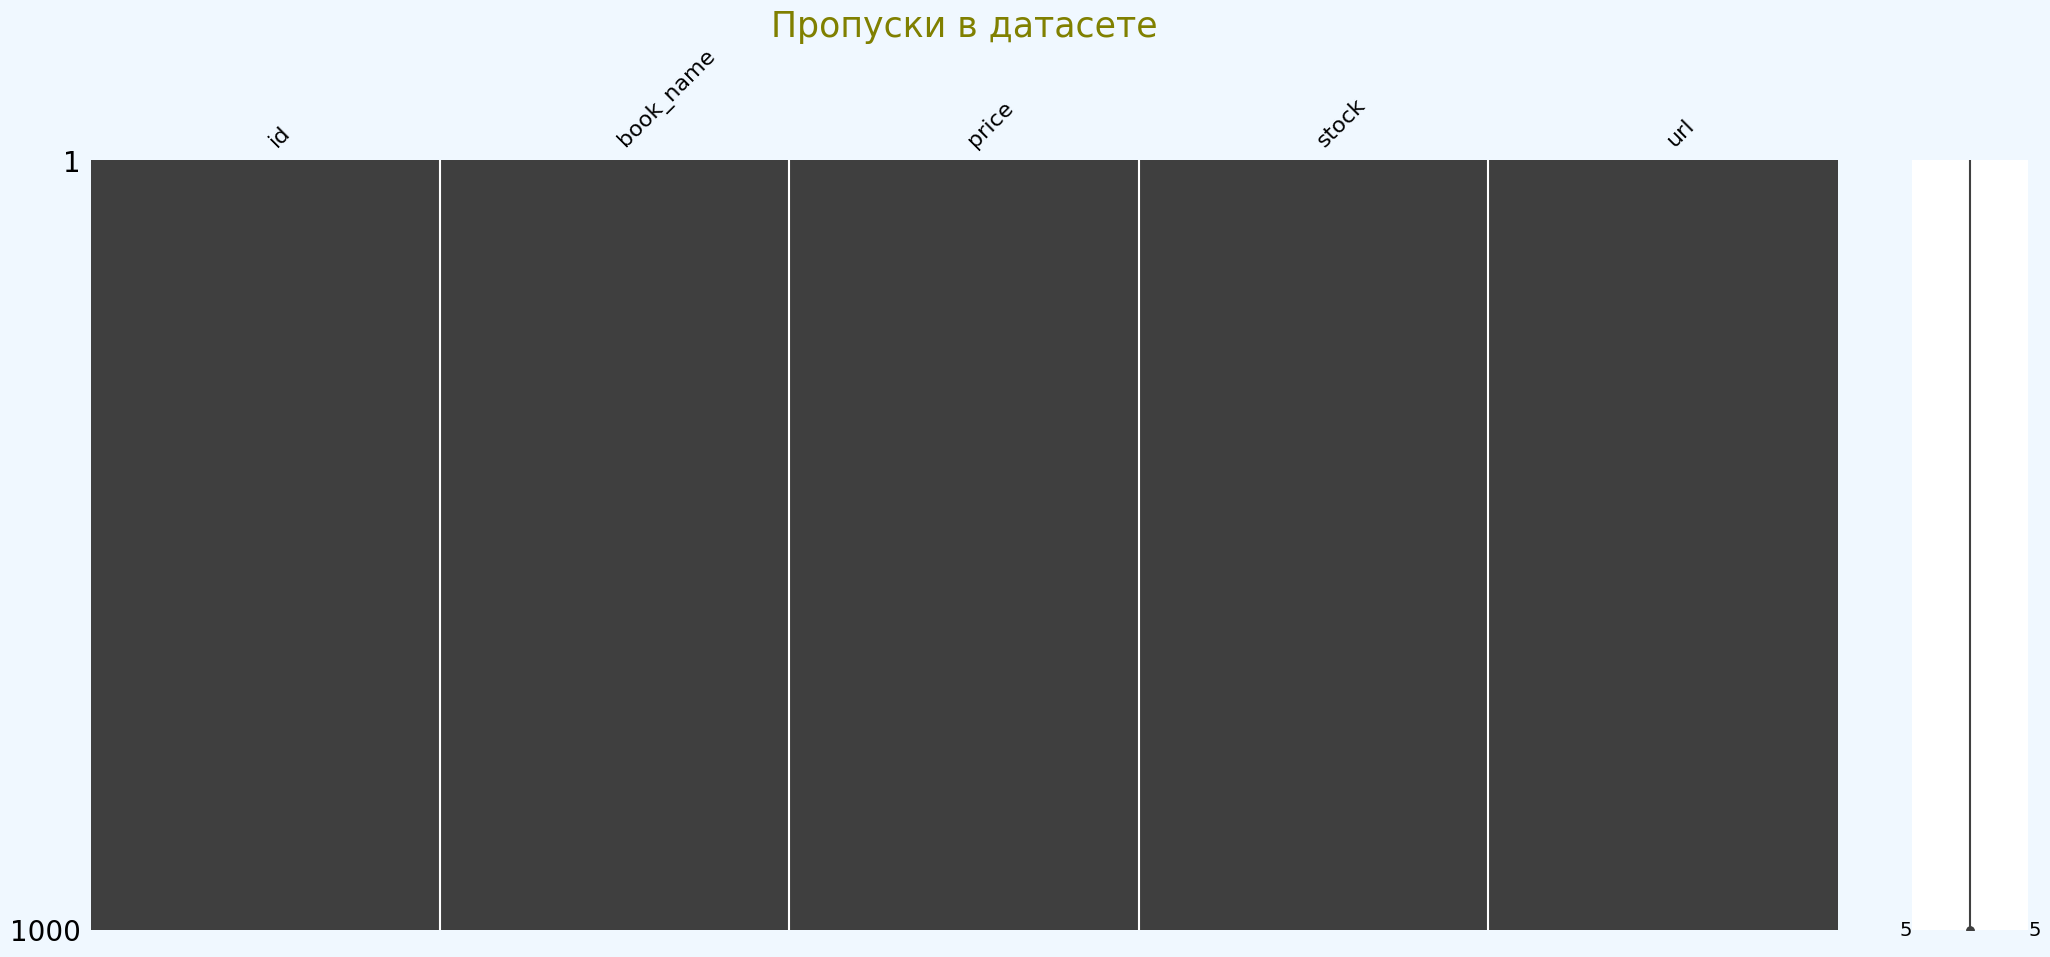

In [63]:
msno.matrix(df)
plt.title('Пропуски в датасете')
plt.show()

In [64]:
lines = df.values
headers = df.columns.tolist()
print('-'*125)
print('Столбцы: ', headers)
print('-'*125)
print('Количество строк: ', len(lines))

-----------------------------------------------------------------------------------------------------------------------------
Столбцы:  ['id', 'book_name', 'price', 'stock', 'url']
-----------------------------------------------------------------------------------------------------------------------------
Количество строк:  1000


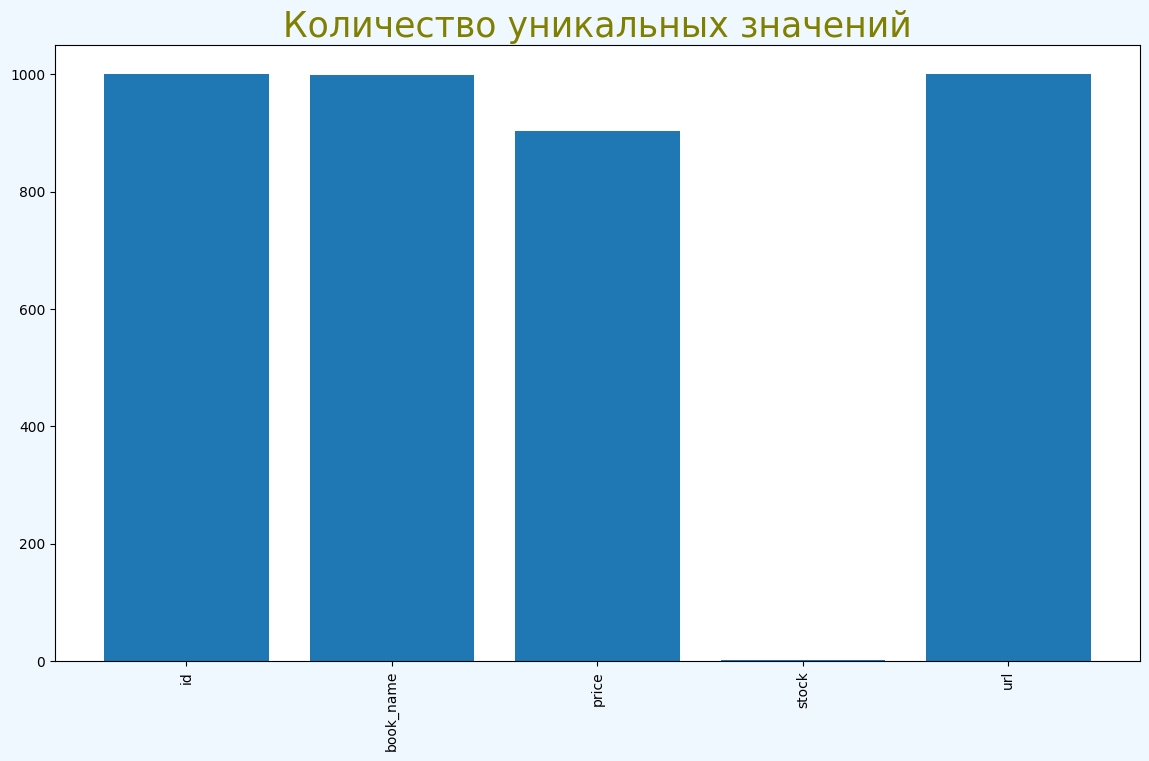

In [65]:
# Unique value count
unique_val_count = np.zeros(len(headers))
for i, col in enumerate(headers):
    unique_val_count[i] = len(np.unique(df[col]))
x = df.columns.tolist()
plt.bar(x, height=unique_val_count)
plt.ylabel = 'value count'
plt.xticks(rotation=90)
plt.title('Количество уникальных значений')
plt.show()

# ЗАДАНИЕ ПРО

Так, мы спарсили данные о книгах. Но данные какие-то неполные. Часть названия стирается из-за отображения и нет ни полного названия книги, ни описания этой книги, ни жанра.

Вам необходимо дополнить датасет, спарсив дополнительные данные из того же сайта:

https://books.toscrape.com/
 
Итоговая таблица должна содержать следующие столбцы:

| Название столбца | Описание | 
|--|--|
|id| Идентификатор книги |
|book_name| Название книги - только полное название|
|genre| жанр книги |
|desc| описание |
|price| Цена в £ |
|stock| Наличие книги. 1 или 0|
|url| Ссылка на книгу |
| num_of_rev | количество отзывов|

## Парсинг данных и обогащение датасета

In [66]:
# ваш код здесь

# Создаем пустой список для хранения данных
data = []

# Перебираем все страницы с книгами (всего 50 страниц)
for page in tqdm(range(1, 51)):
    url = f"https://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Находим все книги на странице
    books = soup.find_all("article", class_="product_pod")
   
    # Перебираем каждую книгу и извлекаем нужную информацию
    for book in books:
        book_data = {}
        
        # Извлекаем id книги
        book_data["id"] = len(data)
        
        # Извлекаем название книги
        book_data["book_name"] = book.h3.a["title"]
                 
        #извлекаем URL страницы и получаем содержимое html страницы с описанием книги
        book_url = book.h3.a["href"]
        book_response = requests.get(f"https://books.toscrape.com/catalogue/{book_url}")
        book_soup = BeautifulSoup(book_response.content, "html.parser")
        
         # Извлекаем жанр книги
        genre = book_soup.find("ul", class_="breadcrumb").find_all("li")[2].text.strip()
        book_data["genre"] = genre
       
        # Извлекаем описание книги
        sub_header = book_soup.find("div", class_="sub-header")
        desc_element = sub_header.find_next_sibling("p")
        book_data["desc"] = desc_element.text.strip() if desc_element else ""
        
        # Извлекаем цену книги
        price = book.find("p", class_="price_color").text
        book_data["price"] = price.replace("£", "")
        
        # Извлекаем наличие книги
        stock = book.find("p", class_="instock availability").text
        book_data["stock"] = 1 if "In stock" in stock else 0
        
        # Извлекаем ссылку на книгу
        book_data["url"] = f"https://books.toscrape.com/catalogue/{book_url}"
        
        # Извлекаем количество отзывов
        num_of_rev = int(book_soup.find("table", class_="table table-striped").find_all('td')[-1].text.strip())
        book_data["num_of_rev"] = num_of_rev
        
        # Добавляем данные в список
        data.append(book_data)

# Создаем таблицу данных из списка
df = pd.DataFrame(data)


100%|██████████| 50/50 [14:49<00:00, 17.79s/it]


## Итоговый датасет PRO

In [67]:
df.columns

Index(['id', 'book_name', 'genre', 'desc', 'price', 'stock', 'url',
       'num_of_rev'],
      dtype='object')

In [68]:
df.shape

(1000, 8)

In [69]:
display(
    df.head(),
    df.tail()
)

,id,book_name,genre,desc,price,stock,url,num_of_rev
0,0,A Light in the Attic,Poetry,It's hard to imagine a world without A Light i...,51.77,1,https://books.toscrape.com/catalogue/a-light-i...,0
1,1,Tipping the Velvet,Historical Fiction,"""Erotic and absorbing...Written with starling ...",53.74,1,https://books.toscrape.com/catalogue/tipping-t...,0
2,2,Soumission,Fiction,"Dans une France assez proche de la nôtre, un h...",50.10,1,https://books.toscrape.com/catalogue/soumissio...,0
3,3,Sharp Objects,Mystery,"WICKED above her hipbone, GIRL across her hear...",47.82,1,https://books.toscrape.com/catalogue/sharp-obj...,0
4,4,Sapiens: A Brief History of Humankind,History,From a renowned historian comes a groundbreaki...,54.23,1,https://books.toscrape.com/catalogue/sapiens-a...,0


,id,book_name,genre,desc,price,stock,url,num_of_rev
995,995,Alice in Wonderland (Alice's Adventures in Won...,Classics,,55.53,1,https://books.toscrape.com/catalogue/alice-in-...,0
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,High school student Kei Nagai is struck dead i...,57.06,1,https://books.toscrape.com/catalogue/ajin-demi...,0
997,997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,"In England’s Regency era, manners and elegance...",16.97,1,https://books.toscrape.com/catalogue/a-spys-de...,0
998,998,1st to Die (Women's Murder Club #1),Mystery,"James Patterson, bestselling author of the Ale...",53.98,1,https://books.toscrape.com/catalogue/1st-to-di...,0
999,999,"1,000 Places to See Before You Die",Travel,"Around the World, continent by continent, here...",26.08,1,https://books.toscrape.com/catalogue/1000-plac...,0


In [71]:

# Сохраняем таблицу данных в CSV файл
df.to_csv("books_dataset.csv", index=False)

Вывод 

Спарсили данные о книгах из сайта:

https://books.toscrape.com/
 
Итоговый датасет содержит следующие столбцы:

| Название столбца | Описание | 
|--|--|
|id| Идентификатор книги |
|book_name| Название книги - только полное название|
|genre| жанр книги |
|desc| описание |
|price| Цена в £ |
|stock| Наличие книги. 1 или 0|
|url| Ссылка на книгу |
| num_of_rev | количество отзывов|

Датасет сохранили в итоговый файл `books_dataset.csv`